In [63]:
import pandas as pd


pd.options.mode.copy_on_write = True

covid_df = pd.read_csv('data/owid_covid_data_top_10.csv',
                       sep=',', encoding='utf8')

covid_df['time_period'] = covid_df['date'].str[:7]
covid_df.fillna(0, inplace=True)

covid_df = covid_df.groupby(['location', 'time_period'], as_index=False).agg(
    total_cases=('total_cases', 'max'),
    new_cases=('new_cases', 'sum'),
    total_deaths=('total_deaths', 'max'),
    new_deaths=('new_deaths', 'sum'),
    population=('population', 'mean'),
    people_fully_vaccinated=('people_fully_vaccinated', 'max'),
    median_age=('median_age', 'mean'),
    aged_65_older=('aged_65_older', 'mean'),
    cardiovasc_death_rate=('cardiovasc_death_rate', 'mean'),
    diabetes_prevalence=('diabetes_prevalence', 'mean')
)

covid_df.head()

,location,time_period,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence
0,Brazil,2020-02,2.0,2.0,0.0,0.0,213993441.0,0.0,33.5,8.552,177.961,8.11
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,0.0,33.5,8.552,177.961,8.11
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,0.0,33.5,8.552,177.961,8.11
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,0.0,33.5,8.552,177.961,8.11
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,0.0,33.5,8.552,177.961,8.11


In [64]:
covid_df['new_cases_per_million'] = covid_df['new_cases'] / \
    covid_df['population'] * 1e6
covid_df['total_cases_per_million'] = covid_df['total_cases'] / \
    covid_df['population'] * 1e6
covid_df['total_deaths_per_million'] = covid_df['total_deaths'] / \
    covid_df['population'] * 1e6

covid_df.head()

,location,time_period,total_cases,new_cases,total_deaths,new_deaths,population,people_fully_vaccinated,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence,new_cases_per_million,total_cases_per_million,total_deaths_per_million
0,Brazil,2020-02,2.0,2.0,0.0,0.0,213993441.0,0.0,33.5,8.552,177.961,8.11,0.009346,0.009346,0.000000
1,Brazil,2020-03,5717.0,5715.0,201.0,201.0,213993441.0,0.0,33.5,8.552,177.961,8.11,26.706426,26.715772,0.939281
2,Brazil,2020-04,87187.0,81470.0,6006.0,5805.0,213993441.0,0.0,33.5,8.552,177.961,8.11,380.712603,407.428375,28.066281
3,Brazil,2020-05,516137.0,428950.0,29367.0,23361.0,213993441.0,0.0,33.5,8.552,177.961,8.11,2004.500689,2411.929065,137.233178
4,Brazil,2020-06,1412669.0,916328.0,59792.0,30425.0,213993441.0,0.0,33.5,8.552,177.961,8.11,4282.037785,6601.459341,279.410433


In [65]:
covid_by_year_df = covid_df

covid_by_year_df['year'] = covid_by_year_df['time_period'].str[:4]

covid_by_year_df = covid_by_year_df[[
    'location', 'year', 'total_cases_per_million', 'total_deaths_per_million']]

covid_by_year_df = covid_by_year_df.groupby(['location', 'year'], as_index=False).agg(
    total_cases_per_million=('total_cases_per_million', 'mean'),
    total_deaths_per_million=('total_deaths_per_million', 'mean')
)

covid_by_year_df.head()

,location,year,total_cases_per_million,total_deaths_per_million
0,Brazil,2020,14012.798645,417.218395
1,Brazil,2021,82042.858423,2245.045445
2,Brazil,2022,129756.159209,3005.514236
3,France,2020,10009.454135,412.325848
4,France,2021,91622.681271,1590.942126


[]

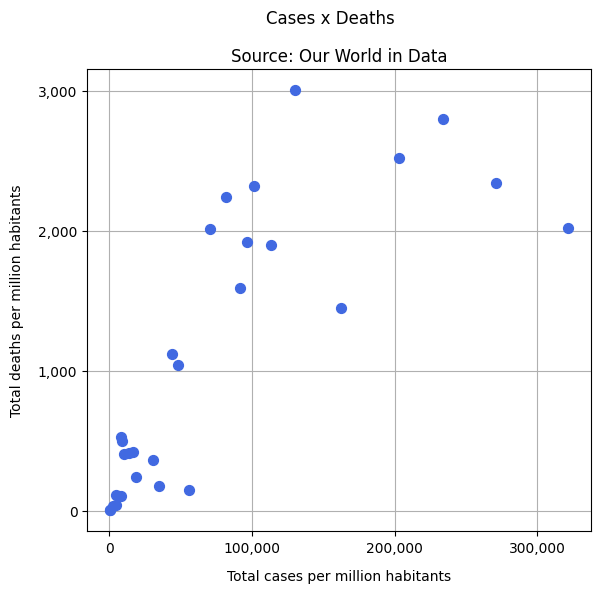

In [66]:
import matplotlib.pyplot as plt


x = covid_by_year_df['total_cases_per_million']
y = covid_by_year_df['total_deaths_per_million']

x_ticks = [0, 1e5, 2e5, 3e5]
x_labels = [0] + [f'{x}00,000' for x in range(1, 4)]
y_ticks = [0, 1e3, 2e3, 3e3]
y_labels = [0] + [f'{x},000' for x in range(1, 4)]

figure, axes = plt.subplots(1, 1, figsize=(6.5, 6))
axes.scatter(x, y, marker='o', color='royalblue', s=50)

axes.set_xlabel('Total cases per million habitants', labelpad=10)
axes.set_ylabel('Total deaths per million habitants', labelpad=10)
axes.set_xticks(x_ticks, x_labels)
axes.set_yticks(y_ticks, y_labels)

axes.grid(True)
axes.set_axisbelow(True)

plt.suptitle('Cases x Deaths')
plt.title('Source: Our World in Data')

plt.plot()

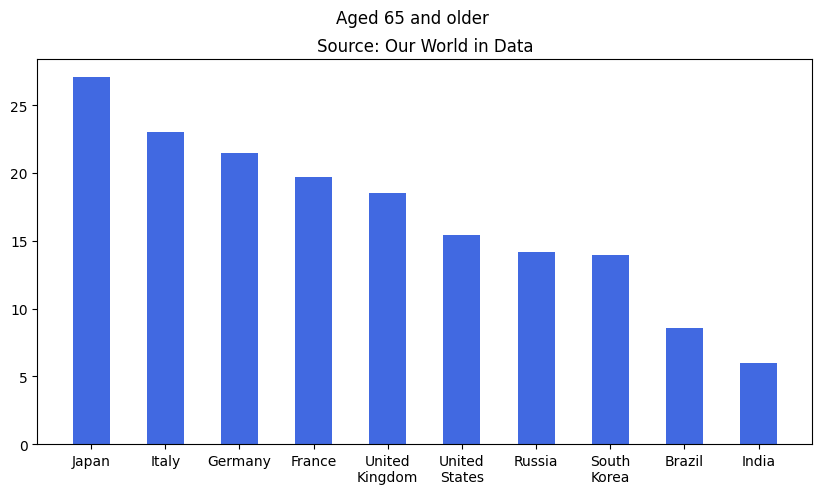

In [68]:
aged_65_older_df = covid_df.groupby(['location', 'aged_65_older'], as_index=False).agg(
    aged_65_older=('aged_65_older', 'mean'),
).drop_duplicates('location').sort_values('aged_65_older', ascending=False)

aged_65_older_df.reset_index(inplace=True, drop=True)

location = aged_65_older_df['location']
aged_65_older = aged_65_older_df['aged_65_older']

for loc in [4, 5, 7]:
    location.iloc[loc] = location[loc].replace(' ', '\n')

figure, axes = plt.subplots(figsize=(10, 5))
axes.bar(location, aged_65_older, color='royalblue', width=0.5)

plt.suptitle('Aged 65 and older')
plt.title('Source: Our World in Data')
plt.show()